Course AH2174/FAH3002 - Traffic Simulation Modeling and Applications   
Lab1: Programming and Computer Simulation Basics  
Author: Pengnan Chi  
Date: 10.31.2022

---




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
from datetime import datetime

## Generating Random Numbers

In [2]:
class RandomNumberGenerator():
    def __init__(self, a, b, m, z):
        self.a = a
        self.b = b
        self.m = m
        self.initZ = z
        self.itemZ = z

    def generate(self, n):
        randomNumbers = []
        zi0 = self.itemZ
        for i in range(n):
            zi1 = (zi0 * self.a + self.b) % self.m
            randomNumbers.append(zi1/self.m)
            zi0 = zi1
        self.itemZ = zi0
        return randomNumbers

    def resetSeed(self):
        self.itemZ = self.initZ

    def plotRandomNumbers(self, n):
        randomNumbers = self.generate(n)
        plt.figure(figsize=(10,2))
        plt.plot(randomNumbers, '.-b',alpha=0.4)
        plt.ylabel('Random numbers')
        plt.xlabel('Iterations')
        plt.show()

    def histRandomNumbers(self, n):
        randomNumbers = self.generate(n)
        plt.figure(figsize=(10,2))
        plt.hist(randomNumbers, bins=50)
        # plt.ylabel('Random numbers')
        # plt.xlabel('Iterations')
        plt.show()



In [3]:
rand_num_gen = RandomNumberGenerator(a=1140671485, b=12820163, m=2**24, z=124324)

In [4]:
rand_num_gen.generate(5)

[0.8183264136314392,
 0.21583926677703857,
 0.7200170159339905,
 0.5548348426818848,
 0.6958281397819519]

In [5]:
year = datetime.now().year
microsecond = datetime.now().microsecond

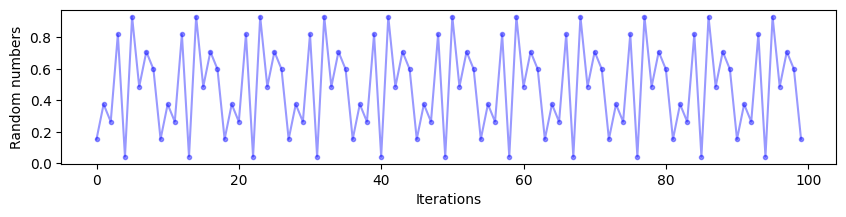

In [6]:
rand_num_gen = RandomNumberGenerator(a=22, b=1, m=72, z=year)
rand_num_gen.plotRandomNumbers(100)

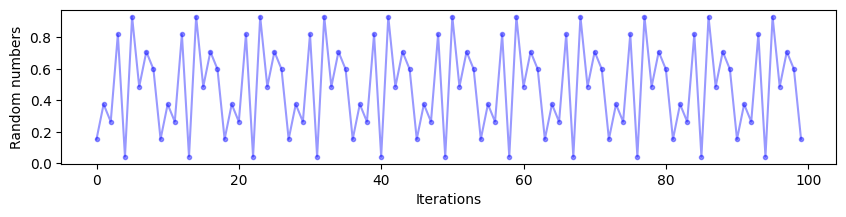

In [7]:
rand_num_gen.resetSeed()
rand_num_gen.plotRandomNumbers(100)

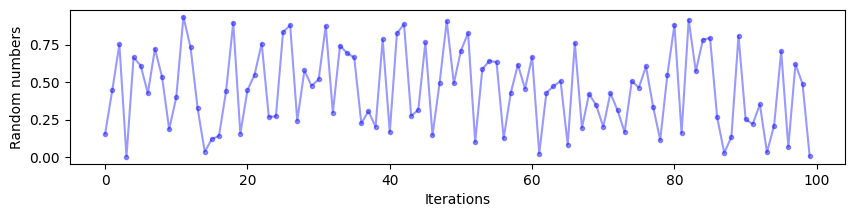

In [8]:
rand_num_gen = RandomNumberGenerator(a=1140671485, b=12820163, m=2**24, z=year)
rand_num_gen.plotRandomNumbers(100)

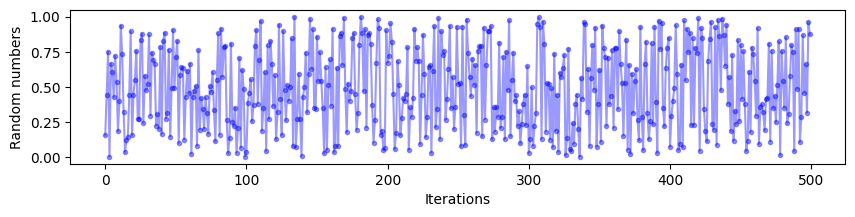

In [9]:
rand_num_gen.resetSeed()
rand_num_gen.plotRandomNumbers(500)

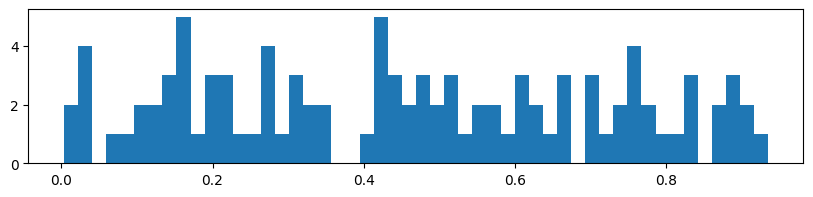

In [10]:
rand_num_gen.resetSeed()
rand_num_gen.histRandomNumbers(100)

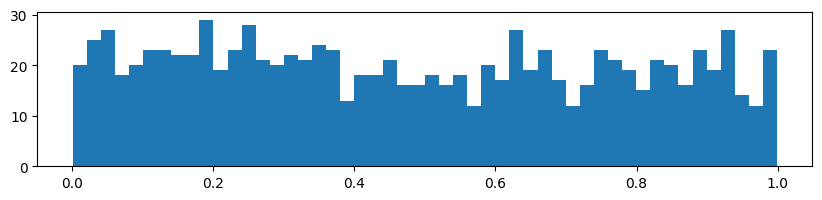

In [11]:
rand_num_gen.resetSeed()
rand_num_gen.histRandomNumbers(1000)

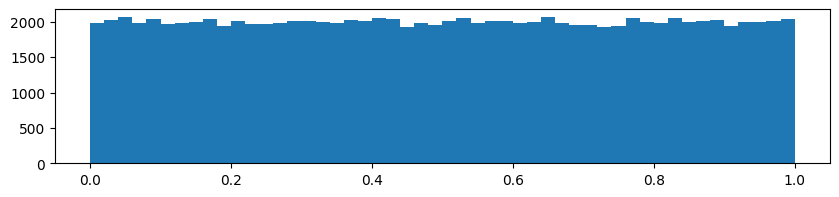

In [12]:
rand_num_gen.resetSeed()
rand_num_gen.histRandomNumbers(100000)

## Monte Carlo Estimation
$\int_a^bh(x)dx \approx \mathbb{E}[h(X)], X\sim U(a,b)$

In [13]:
def func1(x):
    return np.power(1-np.square(x), 1.5)

def func2(x):
    return x/ np.square((1+np.square(x)))

def func2_transferred(y):
    return func2(1/y - 1) / np.square(y)


def monte_carlo_estimation(func, randomNumbers):
    if isinstance(randomNumbers, list):
        randomNumbers = np.array(randomNumbers)

    randomNumbers[randomNumbers==0] = 1e-9
    return np.mean(func(randomNumbers))


In [14]:
n = 10000000
rand_num_gen = RandomNumberGenerator(a=1140671485,b=12820163,m=2**24, z=microsecond)

In [15]:
randomNumbers = rand_num_gen.generate(n)
integral1 = monte_carlo_estimation(func1, randomNumbers)
integral2 = monte_carlo_estimation(func2_transferred, randomNumbers)

In [16]:
print(integral1, integral2)

0.5889053618835591 0.49999931405040093


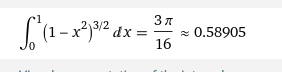

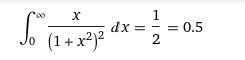




## Discrete RV

In [17]:
def factorial(x):
    return np.math.factorial(x)

class BinomialRandomNumberGenerator():
    def __init__(self, n=2, p=.5, a=1140671485, b=12820163, m=2**24, z=2022):
        self.n = n
        self.p = p
        self.uniformRNGenerator = RandomNumberGenerator(a,b,m,z)

        probabilities=[(factorial(n)/(factorial(i)*factorial(n-i)))*np.power(p,i)*np.power(1-p, n-i)\
                       for i in range(n+1)]

        self.interval = np.cumsum(probabilities)

    def generate(self, n):
        randomNumbers = self.uniformRNGenerator.generate(n)
        if isinstance(randomNumbers, list):
            randomNumbers = np.array(randomNumbers)

        pLeft = 0
        for i, pRight in enumerate(self.interval):
            #print(randomNumbers[(randomNumbers>=pLeft)&(randomNumbers<pRight)])
            randomNumbers[(randomNumbers>=pLeft)&(randomNumbers<pRight)] = i
            pLeft = pRight

        return randomNumbers

    def histRandomNumbers(self, x):
        randomNumbers = self.generate(x)
        plt.hist(randomNumbers, bins=np.arange(self.n+1), density=True)
        plt.ylabel("Density")
        plt.xlabel("n")
        plt.show()



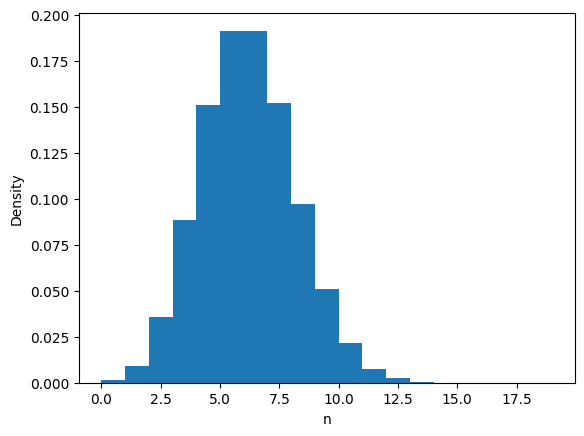

In [18]:
binomial_rand_gen = BinomialRandomNumberGenerator(19, .3)
binomial_rand_gen.histRandomNumbers(100000)

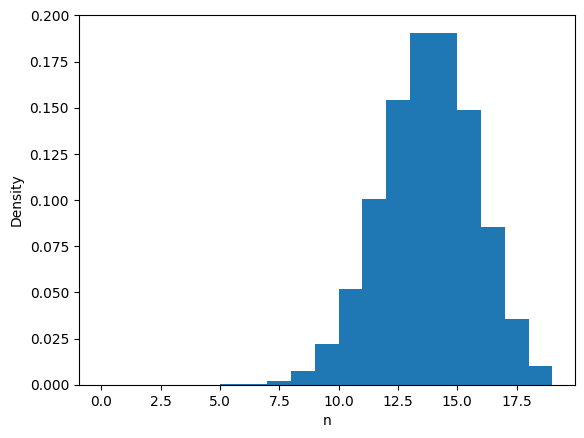

In [19]:
binomial_rand_gen = BinomialRandomNumberGenerator(19, .7)
binomial_rand_gen.histRandomNumbers(100000)

## Continous RV (Inverse Transform Method)

$p(x) = \lambda e^{-\lambda x}$.  
$y = P(x) = 1-e^{-\lambda x}$.  
$x = -\frac{ln(1-y)}{\lambda}, y \sim U(0,1)$



In [20]:
class ExpenotialRandomNumberGenerator():
    def __init__(self, l, a=1140671485, b=12820163, m=2**24, z=2022):
        self.l = l
        self.uniformRNGenerator = RandomNumberGenerator(a,b,m,z)

    def inverseTransform(self, x):
        return -np.log(1-x)/self.l

    def generate(self, n):
        randomNumbers = self.uniformRNGenerator.generate(n)
        if isinstance(randomNumbers, list):
            randomNumbers = np.array(randomNumbers)
        return self.inverseTransform(randomNumbers)

    def histRandomNumbers(self, n, bins=40):
        randomNumbers = self.generate(n)
        plt.hist(randomNumbers, bins=bins, label=f'lambda: {self.l}')
        plt.ylabel("Density")
        plt.xlabel("x")
        plt.xlim([-0.5,8])
        plt.legend()
        plt.show()


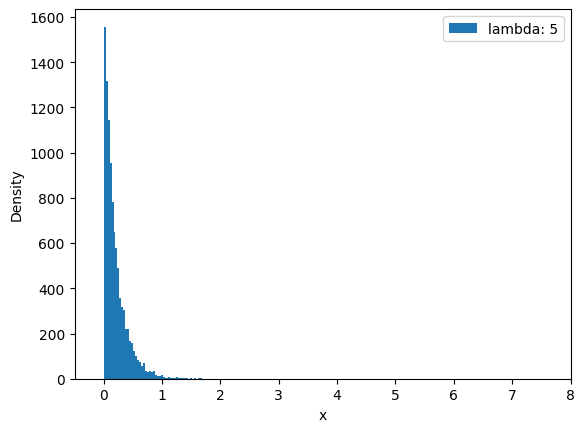

In [21]:
exp_rand_gen= ExpenotialRandomNumberGenerator(5)
exp_rand_gen.histRandomNumbers(10000, 50)

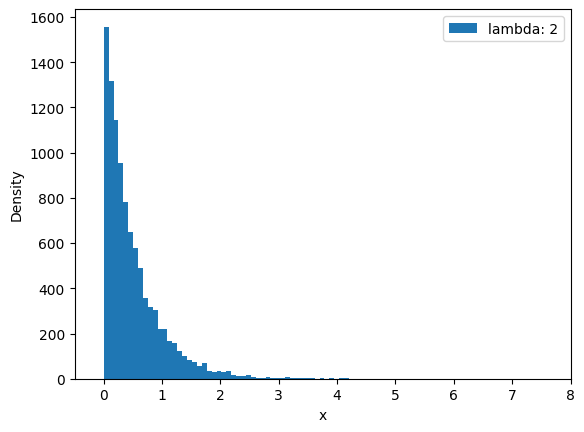

In [22]:
exp_rand_gen= ExpenotialRandomNumberGenerator(2)
exp_rand_gen.histRandomNumbers(10000, 50)

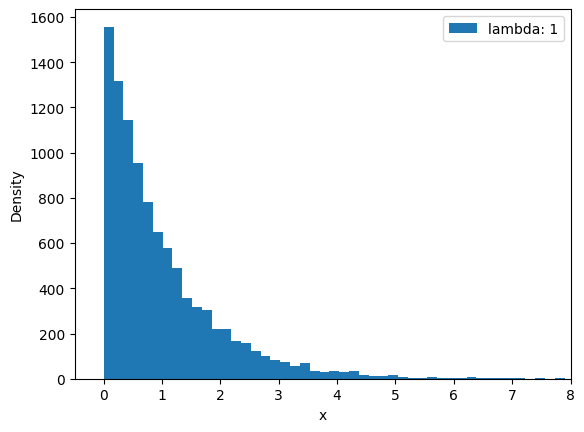

In [23]:
exp_rand_gen= ExpenotialRandomNumberGenerator(1)
exp_rand_gen.histRandomNumbers(10000, 50)

## Continous RV (Rejection Method )

In [24]:
class GuassianRandomNumberGenerator():
    def __init__(self, c, l=1, a=1140671485, b=12820163, m=2**24, z=2022):
        self.c = c
        self.l = l
        self.uniformRNGenerator = RandomNumberGenerator(a,b,m,z*2)
        self.expRNGenerator = ExpenotialRandomNumberGenerator(l, a,b,m,z)

    def expDistr(self, x):
        return self.l * np.exp(-self.l * x)

    def gaussianDistr(self, x):
        return 2/np.sqrt(2*np.pi) * np.exp(-np.square(x)/2)

    def generate(self, n):
        unifRandomNumbers = np.array(self.uniformRNGenerator.generate(n))
        expRandomNumber = np.array(self.expRNGenerator.generate(n))

        gX = self.expDistr(expRandomNumber)
        fX = self.gaussianDistr(expRandomNumber)

        return expRandomNumber[ fX/(self.c*gX) > unifRandomNumbers]

    def histRandomNumbers(self, n, bins=40, density=False):
        randomNumbers = self.generate(n)
        plt.hist(randomNumbers, bins=bins, density=density, label=f'c: {self.c}')
        plt.ylabel("Density")
        plt.xlabel("x")
        plt.xlim([-0.5,6])
        plt.legend()
        plt.show()

In [25]:
gaussian_rand_gen = GuassianRandomNumberGenerator(1)

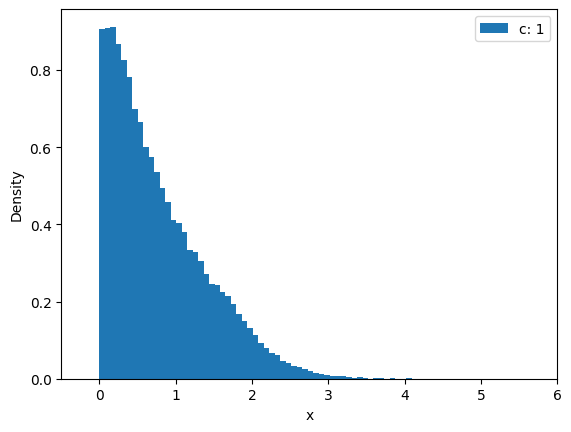

In [26]:
gaussian_rand_gen.histRandomNumbers(100000, 60, True)